# Atividade T2.1

Ajustando $f(x)=a⋅x$ a uma tabela de pontos pelo método dos mínimos quadrados

In [7]:
pkg install "https://downloads.sourceforge.net/project/octave/Octave%20Forge%20Packages/Individual%20Package%20Releases/optim-1.6.2.tar.gz"
pkg load optim

For information about changes from previous versions of the optim package, run 'news optim'.


In [2]:
 leasqrfunc = @(x, p) p(1) * exp (-p(2) * x);
 leasqrdfdp = @(x, f, p, dp, func) [exp(-p(2)*x), -p(1)*x.*exp(-p(2)*x)];


data =

   9.0484e-01
   3.3287e-01
   1.2246e-01
   4.5049e-02
   1.6573e-02
   6.0967e-03
   2.2429e-03
   8.2510e-04
   3.0354e-04
   1.1167e-04

 Least Squares Estimates of Parameters
   1.0050   0.1026
 Correlation matrix of parameters estimated
   1.0000   0.5745
   0.5745   1.0000
 Covariance matrix of Residuals
   2.6477e-03
   9.7403e-04
   3.5832e-04
   1.3182e-04
   4.8494e-05
   1.7840e-05
   6.5629e-06
   2.4144e-06
   8.8820e-07
   3.2675e-07
 Correlation Coefficient R^2
0.9983
 95% conf region: F(0.05)(2,8)>= delta_pvec.'*Z*delta_pvec
Z =

   1.8909e+02  -1.2096e+03
  -1.2096e+03   2.3441e+04

f1 =

   9.0704e-01
   3.2514e-01
   1.1655e-01
   4.1778e-02
   1.4975e-02
   5.3681e-03
   1.9242e-03
   6.8976e-04
   2.4725e-04
   8.8628e-05

p1 =

   1.0050
   0.1026

kvg1 = 1
iter1 = 7
corp1 =

   1.0000   0.5745
   0.5745   1.0000

covp1 =

   3.9471e-03   2.0368e-04
   2.0368e-04   3.1840e-05

covr1 =

   2.6477e-03
   9.7403e-04
   3.5832e-04
   1.3182e-04
   4.8494e-05


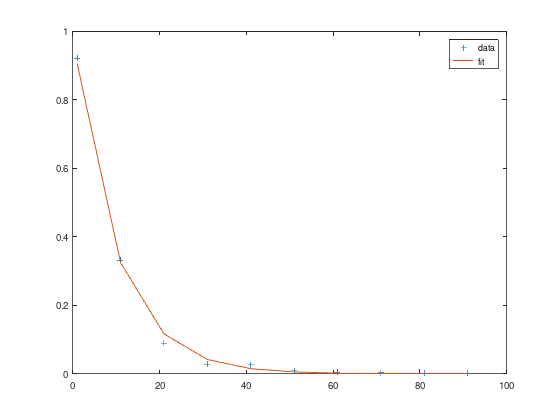

In [10]:
% Define functions

 % generate test data
 t = [1:10:100]';
 p = [1; 0.1];
 data = leasqrfunc(t, p);
 data
 
 rnd = [0.352509; -0.040607; -1.867061; -1.561283; 1.473191;
        0.580767;  0.841805;  1.632203; -0.179254; 0.345208];

 % add noise
 % wt1 = 1 /sqrt of variances of data
 % 1 / wt1 = sqrt of var = standard deviation
 wt1 = (1 + 0 * t) ./ sqrt (data); 
 data = data + 0.05 * rnd ./ wt1; 

 % Note by Thomas Walter :
 %
 % Using a step size of 1 to calculate the derivative is WRONG !!!!
 % See numerical mathbooks why.
 % A derivative calculated from central differences need: s 
 %     step = 0.001...1.0e-8
 % And onesided derivative needs:
 %     step = 1.0e-5...1.0e-8 and may be still wrong

 F = leasqrfunc;      # Nome da função ou identificador de função
 dFdp = leasqrdfdp;   # Nome da função derivada parcial entre aspas ou identificador de função
 % dFdp = dfdp;     % estimated derivative
 dp = [0.001; 0.001]; # Incremento fracionário de p para derivadas parciais numéricas.
                      # dp(j) > 0 significa diferenças centrais no j-ésimo parâmetro p(j).
                      # dp(j) < 0 significa diferenças unilaterais no j-ésimo parâmetro p(j).
                      # dp(j) = 0 mantém p(j) fixo, ou seja, leasqr não mudará a estimativa inicial: pin(j)
 pin = [.8; .05];     # estimativa inicial
 stol=0.001;          # Tolerância escalar na melhoria fracionária na soma escalar dos quadrados residuais
 niter=50;            # Número máximo de iterações
 minstep = [0.01; 0.01]; # Vetor coluna (mesmo comprimento do pin ) das precisões 
                         # fracionárias desejadas nas estimativas de parâmetros. 
                         # As iterações são encerradas se a alteração no vetor de
                         # parâmetro (chg) em relação à estimativa de parâmetro 
                         # atual for menor que seus elementos correspondentes em
                         #'fract_prec', ou seja, all 
                         # (abs (chg) < abs (options.fract_prec .* current_parm_est))
                         # em duas iterações consecutivas.
 maxstep = [0.8; 0.8];   # Vetor da coluna (mesmo comprimento do pino ) de 
                         # mudanças fracionais máximas no vetor de parâmetros. 
                         # A alteração fracionária nos elementos do vetor de 
                         # parâmetros é restrita a ser no máximo 'max_fract_change' 
                         # entre iterações sucessivas, ou seja, abs 
                         # (chg(i)) = abs (min([chg(i), options.max_fract_change(i)
                         # * current param estimate])).
 options = [minstep, maxstep];

 global verbose;
 verbose = 1;
 [f1, p1, kvg1, iter1, corp1, covp1, covr1, stdresid1, Z1, r21] = leasqr(t, data, pin, F, stol, niter, wt1, dp, dFdp, options)

In [22]:
  %% Example for linear inequality constraints.
  %% model function:
  F = @ (x, p) p(1) * exp (p(2) * x);
  %% independents and dependents:
  x = 1:5;
  y = [1, 2, 4, 7, 14];
  %% initial values:
  init = [0.25; 0.25];
  %% other configuration (default values):
  tolerance = 0.0001;
  max_iterations = 20;
  weights = ones(1, 5);
  dp = [0.001; 0.001]; % bidirectional numeric gradient stepsize
  dFdp = "dfdp"; % function for gradient (numerical)

  %% linear constraints, A.' * parametervector + B >= 0
  A = [1; -1]; B = 0; % p(1) >= p(2);
  options.inequc = {A, B};

  %% start leasqr, be sure that 'verbose' is not set
  global verbose; verbose = false;
  [f, p, cvg, iter] = leasqr (x, y, init, F, tolerance, max_iterations, weights, dp, dFdp, options)

error: invalid dot name structure assignment because the structure array is empty.  Specify a subscript on the structure array to resolve.
f =

    1.0219    1.9636    3.7731    7.2499   13.9305

p =

   0.5318
   0.6531

cvg = 1
iter = 6



Curve Fitting
1.) Matrices formed in least-squares polynomial curve fitting
A matrix:
A =

   5.0000e+00   1.0000e+02   3.0000e+03   1.0000e+05
   1.0000e+02   3.0000e+03   1.0000e+05   3.5400e+06
   3.0000e+03   1.0000e+05   3.5400e+06   1.3000e+08
   1.0000e+05   3.5400e+06   1.3000e+08   4.8900e+09


b matrix:
b =

   3.1687e+02
   7.8019e+03
   2.4968e+05
   8.6474e+06



2.)The following cubic polynomial interpolates the data points: 
-0.00027083*x^3 + 0.023229*x^2 + 0.95244*x^1 + 35.805
where:
    a_0 = -0.000271
     a_1 = 0.023229
     a_2 = 0.952440
     a_3 = 35.804714
SOLUTION: Cholesky LDLt
L =

       1       0       0       0
      20       1       0       0
     600      40       1       0
   20000    1540      60       1

D =

Diagonal Matrix

   5.0000e+00            0            0            0
            0   1.0000e+03            0            0
            0            0   1.4000e+05            0
            0            0            0   1.4400e+07

L_transpose =

 

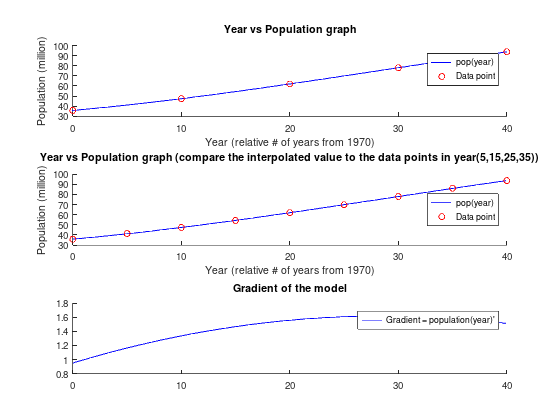

In [24]:
# Curve Fitting https://medium.com/@richdayandnight/a-tutorial-on-how-to-curve-data-fit-a-set-of-data-points-using-least-squares-fitting-in-gnu-octave-3a6d36dc360c
# Rich Yap 

% Least squares fitting

# Given year (time in years) and population (million)
year = [0,10,20,30,40];
population = [35.80, 47.40, 61.95, 77.99, 93.73];

# Initialize matrix A
A = zeros(4,4);

# Initialize year vectors
year_squared = [];
year_cube = [];
year_fourth = [];
year_fifth = [];
year_sixth = [];

# Fill year vectors with the square, cube, ..., sixth power of year
for i = 1:length(year) 
  year_squared(i) = year(i)**2;
  year_cube(i) = year(i)**3;
  year_fourth(i) = year_squared(i)**2;
  year_fifth(i) = year_squared(i) * year_cube(i);
  year_sixth(i) = year_cube(i)**2;
endfor

# Get the sum of the filled vectors above and put it in the year_vector
year_vector = [];
year_vector(end+1) = sum(year);
year_vector(end+1) = sum(year_squared);
year_vector(end+1) = sum(year_cube); 
year_vector(end+1) = sum(year_fourth);
year_vector(end+1) = sum(year_fifth);
year_vector(end+1) = sum(year_sixth);


# Build the A matrix using the year_vector (Note: Ax = b)
A(1,1) = length(year);
A(1,2:end) = year_vector(1:3);
A(2,1:end) = year_vector(1:4);
A(3,1:end) = year_vector(2:5);
A(4,1:end) = year_vector(3:6);

# Build the b matrix 
b = [];
b(end+1) = sum(population);
b(end+1) = sum(year(1:end) .* population(1:end));
b(end+1) = sum(year_squared(1:end) .* population(1:end));
b(end+1) = sum(year_cube(1:end) .* population(1:end));
b = b.';


# Use Cholesky Decomposition to get a0, a1, a2, a3
# Get L and D in the LDL'   
# reference: mathworks.com/matlabcentral/fileexchange/47-ldlt?focused=5033716&tab=function
n = size(A,1);
L = zeros(n,n);
for j=1:n,
  if (j > 1),
    v(1:j-1) = L(j,1:j-1).*d(1:j-1);
    v(j) = A(j,j)-L(j,1:j-1)*v(1:j-1)';
    d(j) = v(j);
    if (j < n),
      L(j+1:n,j) = (A(j+1:n,j)-L(j+1:n,1:j-1)*v(1:j-1)')/v(j);
    endif
  else
    v(1) = A(1,1);
    d(1) = v(1);
    L(2:n,1) = A(2:n,1) / v(1);    
  endif
endfor

D=diag(d);
L=L+eye(n);

# Ly = b
# Solve for y
y = L\(b);

# DL.'x = y
# Solve for x
x = (D*L.')\(y);

printf("\nCurve Fitting\n1.) Matrices formed in least-squares polynomial curve fitting\nA matrix:\n");
A
printf("\nb matrix:\n");
b

# Flip the x polynomial produced to fit the polynomial format
poly = flip(x);
printf("\n======================================================================\n");
printf("\n2.)The following cubic polynomial interpolates the data points: \n")
polyout(poly, 'x');
printf("where:\n    a_0 = %f\n     a_1 = %f\n     a_2 = %f\n     a_3 = %f\n", poly(1), poly(2), poly(3), poly(4));
printf("SOLUTION: Cholesky LDLt\n");
L
D
L_transpose = L.'
printf("Ly = b // below is the solved y\n");
y
printf("D(Lt)x = y  // below is the solved x\n");
x
printf("\n See the first graph containing the cubic polynomial which fits the data points")

printf("\n======================================================================\n");
complete_year = [0,5,10,15,20,25,30,35,40];
complete_population = [35.80, 41.29, 47.40, 54.32, 61.95, 69.83, 77.99, 86.27, 93.73];
printf("3.) Interpolation the population in years(5,15,25,35) using the model VS real value:\n")
interpolated_values = evalpoly(poly,[5,15,25,35])
real_value = [complete_population(2:2:end)]

# Get first derivative of polynomial generated
first_derivative = polyder(poly.');

# Get second derivative of the polynomial generated
second_derivative = polyder(first_derivative);

printf("\n See the second graph containing the cubic polynomial interpolating the data points")
printf("\n======================================================================\n");
printf("\n4.) The following first derivative of the polynomial generated:\n");
polyout(first_derivative, 'x');

printf("\n======================================================================\n");
printf("\n5.) See the third subplot for the gradient of the first graph\n");

% The following lines are responsible for the plotting of graphs
# Create list of x coordinates
linx = linspace(min(year), max(year));
# Evaluate the polynomial with the created list of x coordinates
liny = evalpoly(poly, linx(:));

# FIRST GRAPH
# Plot the Model --Year vs Population graph--
# AND Plot the given data points
subplot(3,1,1)
hold on;
plot(linx(:), liny(:), "b-");
plot(year(:), population(:), "or");
title("Year vs Population graph");
ylabel("Population (million)");
xlabel("Year (relative # of years from 1970)");
legend("pop(year)", "Data point");
hold off;

# SECOND GRAPH
# Plot the Model --Year vs Population graph--
# AND Plot the given data points with the extra data points
subplot(3,1,2)
hold on;
plot(linx(:), liny(:), "b-");
plot(complete_year(:), complete_population(:), "or");
title("Year vs Population graph (compare the interpolated value to the data points in year(5,15,25,35))");
ylabel("Population (million)");
xlabel("Year (relative # of years from 1970)");
legend("pop(year)", "Data point");
legend("location", "east");
hold off;

subplot(3,1,3)
hold on;

# Evaluate the first_derivative with the created list of x coordinates
liny_first_d = evalpoly(first_derivative, linx(:));

# Plot the Year vs Population graph
plot(linx(:), liny_first_d(:), "b-");
legend("Gradient = population(year)'");
title("Gradient of the model");
hold off;